# EDA of visualization and training a model by given attributes

In [1]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [2]:
import warnings
warnings.filterwarnings("ignore") 

In [3]:
#Load given dataset
data = p.read_csv('depression.csv')
df=data.dropna()

In [4]:
df

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1
...,...,...
7726,is that snow,0
7727,moulin rouge mad me cry once again,0
7728,trying to shout but can t find people on the list,0
7729,ughh can t find my red sox hat got ta wear thi...,0


In [5]:
df.columns

Index(['clean_text', 'is_depression'], dtype='object')

In [6]:
df.groupby('is_depression').describe()

clean_text         \
                   count unique   
is_depression                     
0                   3900   3889   
1                   3831   3761   

                                                                       
                                                             top freq  
is_depression                                                          
0              just been given ma marching order got ta go do...    3  
1              i want to be dead ive been suicidal for year i...    8

Text(0.5, 1.0, 'Distribution of is_depression ')

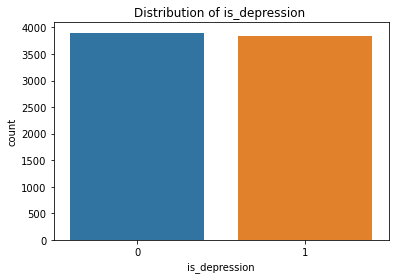

In [7]:
#plotting graph for distribution
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = "is_depression", data = df)
df.loc[:, 'is_depression'].value_counts()
plt.title('Distribution of is_depression ')

In [8]:
df['is_depression'].unique()

array([1, 0], dtype=int64)

Training model:

In [9]:
#!pip install nltk

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import string
# remove whitespaces
df['clean_text']=df['clean_text'].str.strip()
# lowercase the text
df['clean_text'] = df['clean_text'].str.lower()
#remove punctuation
punc = string.punctuation
table = str.maketrans('','',punc)
df['clean_text']=df['clean_text'].apply(lambda x: x.translate(table))
# tokenizing each message
df['word_tokens']=df.apply(lambda x: x['clean_text'].split(' '),axis=1)
# removing stopwords
df['cleaned_text'] = df.apply(lambda x: [word for word in x['word_tokens'] if word not in stopwords.words('english')],axis=1)
# stemming
ps = PorterStemmer()
df['stemmed']= df.apply(lambda x: [ps.stem(word) for word in x['cleaned_text']],axis=1)
# remove single letter words
df['final_text'] = df.apply(lambda x: ' '.join([word for word in x['stemmed'] if len(word)>1]),axis=1)


In [12]:
# Now we'll create a vocabulary for the training set with word count
from collections import defaultdict
vocab=defaultdict(int) 
for text in df['final_text'].values:
    for elem in text.split(' '):
        vocab[elem]+=1
    
print(vocab)

defaultdict(<class 'int'>, {'understand': 307, 'peopl': 1660, 'repli': 54, 'immedi': 50, 'op': 9, 'invit': 41, 'talk': 936, 'privat': 37, 'mean': 280, 'help': 1201, 'type': 128, 'respons': 85, 'usual': 192, 'lead': 83, 'either': 192, 'disappoint': 69, 'disast': 8, 'work': 1490, 'quit': 193, 'differ': 294, 'say': 801, 'pm': 43, 'anytim': 32, 'casual': 13, 'social': 248, 'context': 32, 'huge': 74, 'admir': 7, 'appreci': 115, 'goodwil': 2, 'good': 825, 'citizenship': 1, 'mani': 400, 'support': 183, 'other': 222, 'flag': 5, 'inappropri': 8, 'content': 35, 'even': 1844, 'know': 2398, 'struggl': 315, 'hard': 517, 'behind': 105, 'scene': 16, 'inform': 47, 'resourc': 26, 'make': 1489, 'easier': 46, 'give': 425, 'get': 2913, 'qualiti': 15, 'small': 124, 'start': 1021, 'new': 389, 'wiki': 16, 'page': 39, 'explain': 113, 'detail': 41, 'much': 1131, 'better': 745, 'respond': 50, 'public': 53, 'comment': 92, 'least': 205, 'gotten': 132, 'someon': 684, 'maintain': 15, 'depress': 1984, 'contact': 64,

In [13]:
# divide the set in training and test
from sklearn.model_selection import train_test_split
X,X_test,y,y_test = train_test_split(df.loc[:,'clean_text':],df['is_depression'],test_size=0.2)

In [14]:
#!pip install wordcloud

In [15]:
from wordcloud import WordCloud

ham=' '.join(X.loc[y==0,'final_text'].values)
ham_text = WordCloud(background_color='white',max_words=2000,width = 800, height = 800).generate(ham)

spam=' '.join(X.loc[y==1,'final_text'].values)
spam_text = WordCloud(background_color='black',max_words=2000,width = 800, height = 800).generate(spam)




plt.figure(figsize=[30,50])

plt.subplot(1,3,1)
plt.imshow(ham_text,interpolation='bilinear')
plt.title('')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(spam_text, interpolation='bilinear')
plt.axis('off')
plt.title('')



ModuleNotFoundError: No module named 'wordcloud'